In [1]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
df=pd.read_csv('Reviews.csv')

In [4]:
df_new=df[['Summary','Score']]

In [5]:
df_new.head()

,Summary,Score
0,Good Quality Dog Food,5
1,Not as Advertised,1
2,"""Delight"" says it all",4
3,Cough Medicine,2
4,Great taffy,5


In [6]:
df_new['Score'].replace({1: 'negative', 2: 'negative', 3: 'neutral', 4: 'positive', 5: 'positive'}, inplace=True)

In [7]:
df_new['Score'].value_counts()

positive    443777
negative     82037
neutral      42640
Name: Score, dtype: int64

In [8]:
#df_new.dropna(subset=['Summary'], inplace=True)
df_new['Summary'].fillna('This is replaced', inplace=True)

In [9]:
df_new.isnull().sum()

Summary    0
Score      0
dtype: int64

In [10]:
df_new['Summary'] = df_new['Summary'].str.lower()

In [11]:
#spliting data into train,validation,test datasets
X_tr=df_new.loc[:0.8*(len(df_new)),'Summary']
Y_tr=df_new.loc[:0.8*(len(df_new)),'Score']
X_dev=df_new.loc[0.8*(len(df_new)):0.9*(len(df_new)),'Summary']
Y_dev=df_new.loc[0.8*(len(df_new)):0.9*(len(df_new)),'Score']
X_te=df_new.loc[0.9*(len(df_new)):,'Summary']
Y_te=df_new.loc[0.9*(len(df_new)):,'Score']

In [12]:
X_tr.shape,Y_tr.shape,  X_dev.shape,Y_dev.shape,   X_te.shape,Y_te.shape

((454764,), (454764,), (56845,), (56845,), (56845,), (56845,))

In [13]:
#naive bayes classification

In [14]:
#data understanding
dicts={}
for i in X_tr:
    words=i.split()
    for word in words:
        try:
            if word not in dicts:
                dicts[word]=1
            else:
                dicts[word]+=1    
        except:
            pass

In [15]:
filtered_li=list(dicts.keys())
for i in filtered_li:
    if dicts[i] < 100:
        dicts.pop(i)


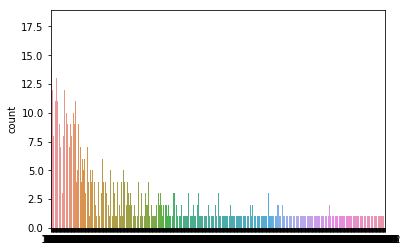

In [16]:
sns.countplot(list(dicts.values())) #many words are less frequent and only some words are more frequent.

In [17]:
len(dicts) #vocabulary size

1757

In [18]:
#inits
positive_prob={}
negative_prob={}
neutral_prob={}
pos=0
neg=0
neu=0
alpha=1 #for smoothing

In [19]:
#traing loop
for j in range(len(X_tr)):

    words=X_tr[j].split()
    for word in words:
        if word not in positive_prob:
            positive_prob[word]=0+alpha
        if word not in negative_prob:
            negative_prob[word]=0+alpha
        if word not in neutral_prob:
            neutral_prob[word]=0+alpha

        if Y_tr[j]=='positive':
            positive_prob[word]+=1 
            pos+=1

        elif Y_tr[j]=='negative':
            negative_prob[word]+=1 
            neg+=1
        else:
            neutral_prob[word]+=1        
            neu+=1

#computing probabilities
pos_prob= {key: value / (pos+alpha) for key, value in positive_prob.items()}
neg_prob= {key: value / (neg+alpha) for key, value in negative_prob.items()}
neu_prob= {key: value / (neu+alpha) for key, value in neutral_prob.items()}


y_pred=[]

for j in X_tr:
    words=j.split()
    p=1
    n=1
    nu=1
    for i in words:
        p*=pos_prob[i]  #assuming condinal independance between words
        n*=neg_prob[i]
        nu*=neu_prob[i]
    temp=max(p,n,nu)
    if temp==p:
        res='positive'
    elif temp==n:
        res= 'negative'
    else:
        res='neutral'
    y_pred.append(res)

#accuracy for data
pred=0
for i in range(len(Y_tr)):
    if Y_tr[i]==y_pred[i]:
        pred+=1

accuracy=pred/len(X_tr)
print('training accuracy is {0}'.format(accuracy))

training accuracy is 0.7327690846241127


In [20]:
#test accuracy
y_pred=[]
ground=Y_te.tolist()
for j in X_te:
    words=j.split()
    p=1
    n=1
    nu=1
    for i in words:
        if i not in pos_prob:   #ignoring new words in test time
            pass
        else:
            p*=pos_prob[i]
            n*=neg_prob[i]
            nu*=neu_prob[i]
    temp=max(p,n,nu)
    if temp==p:
        res='positive'
    elif temp==n:
        res= 'negative'
    else:
        res='neutral'
    y_pred.append(res)

#accuracy for data
pred=0
for i in range(len(Y_te)):
    if ground[i]==y_pred[i]:
        pred+=1

accuracy=pred/len(X_te)
print('testing accuracy is {0}'.format(accuracy)) #model is working fine on unseen data also.

testing accuracy is 0.7298091300905972


In [30]:
#custom input review
print('enter -1 to stop giving input')
bo=True
while(bo):
    p=1
    n=1
    nu=1
    test=input('enter review :')
    if(test=='-1'):
        break
    test=test.lower().split()
    for i in test:
            if i not in pos_prob:
                pass  
            else:
                p*=pos_prob[i]  
                n*=neg_prob[i]
                nu*=neu_prob[i]

    temp=max(p,n,nu)


    if temp==p:
        res='positive'
    elif temp==n:
        res= 'negative'
    elif temp==nu:
        res='neutral'
        
    print('The given review is {0}'.format(res))
    print()
    print()

enter -1 to stop giving input
enter review :very bad experience with this ,do not order
The given review is negative


enter review :this is super fantastic and cool
The given review is positive


enter review :product is satisfactory and okay
The given review is neutral


enter review :-1


In [22]:
# positive_prob={}
# negative_prob={}
# neutral_prob={}

In [23]:
# pos=0
# neg=0
# neu=0

In [24]:
# for j in range(len(X_tr)):
#     words=X_tr[j].split()
#     for word in words:
#         if word not in positive_prob:
#             positive_prob[word]=0
#         if word not in negative_prob:
#             negative_prob[word]=0
#         if word not in neutral_prob:
#             neutral_prob[word]=0
            
#         if Y_tr[j]=='positive':
#             positive_prob[word]+=1 
#             pos+=1
           
#         elif Y_tr[j]=='negative':
#             negative_prob[word]+=1 
#             neg+=1
#         else:
#             neutral_prob[word]+=1        
#             neu+=1

In [25]:
# pos_prob= {key: value / (pos) for key, value in positive_prob.items()}
# neg_prob= {key: value / (neg) for key, value in negative_prob.items()}
# neu_prob= {key: value / (neu) for key, value in neutral_prob.items()}

In [26]:
# len(pos_prob),len(neg_prob),len(neu_prob)

In [27]:
# sum(pos_prob.values())

In [28]:
# sum(neg_prob.values())

In [29]:
# sum(neu_prob.values())